<a href="https://colab.research.google.com/github/ZosoV/aco_random_walk/blob/main/notebooks/display_results_test_aco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Display Results

In this notebook, you can find some results of our work

In [1]:
COLAB_ENV = False

if COLAB_ENV:
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd /content/gdrive/MyDrive/Proyectos/aco_random_walk/
else:
    #%cd /home/zosov/ACO_Random_Walk
    %cd /home/israel.pineda/oscar/aco_random_walk/

/home/israel.pineda/oscar/aco_random_walk


In [2]:
!ls stuff/results/aco_pp

histories_greedy_params_q_0	      histories_params_proximity_dif_size
histories_levy_greedy_params_omega    histories_params_q_0
histories_levy_proximity_paramas_q_0  histories_proximity_paramas_q_0
histories_params_p		      histories_rw_greedy_params_q_0
histories_params_penalty	      histories_rw_levy_greedy_params_omega
histories_params_penalty_dif_size     histories_rw_levy_proximity_params_q_0
histories_params_penalty_p_0-3	      histories_rw_proximity_params_q_0
histories_params_penalty_reduced      random_walks


In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import glob
import pandas as pd

In [4]:
RESULTS_DIR = "stuff/results/aco_pp"
SAVE_DIR = "stuff/results/plots"
EXPERIMENT_FILE = "stuff/experiments/params_experiments.xlsx"

In [40]:
#@title Handy Functions    
def plot_many_distances(list_distances, legend_labels, 
                        legend_title = "var params",  title = "", 
                        save = False , name2save = "default",
                        ylim = None, list_x = None):

  markers = ['o','s','v','D','x','+','p','H','*','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

  
  markers = markers[:len(list_distances)]
  list_iterations = np.arange(len(list_distances[0])) if list_x is None else list_x

  title = 'Average Distance vs Iterations \n' + title
  figure(figsize=(6, 5))#, dpi=80)
  plt.title(title)
  
  i = 0
  for label, distances in zip(legend_labels, list_distances):
    print(f"min dist: {np.amin(distances)}")
    plt.plot(list_iterations, distances, "-", label = str(label)) #, marker = markers[i])
    i += 1

  plt.legend(title=legend_title)
  if ylim is not None:
    plt.ylim(ylim[0], ylim[1])
  if save: plt.savefig(os.path.join(SAVE_DIR,name2save + ".eps"), format='eps')

  plt.show()
  plt.close()
    
#@title Handy Functions    
def plot_many_distances_ax(ax, list_distances, legend_labels, 
                        legend_title = "",  title = "",
                        set_ylabel = None,
                        set_xlabel = None,
                        ylim = None,
                        disable_y_tick = False,
                        optimal_distance = None,
                        doble_col_legend = True):
  #ax.grid(axis = 'y')
  list_iterations = np.arange(0, len(list_distances[0]))

  title = r'Average Distance $\langle x \rangle$ vs Iterations'+' \n' + title
  
  #figure(figsize=(6, 5))#, dpi=80)
  ax.set_title(title)
  
  for label, distances in zip(legend_labels, list_distances):
    print(f"min dist: {np.amin(distances)}")
    ax.plot(list_iterations, distances, "-", label = str(label))
  if optimal_distance is not None:
      ax.plot(list_iterations, [optimal_distance] * len(list_iterations), "b--",linewidth=1.0, label = "optimal distance")
  
  if set_ylabel is not None:
      ax.set_ylabel(set_ylabel, rotation=0, labelpad=10)
  if set_xlabel is not None:
      ax.set_xlabel(set_xlabel)
  if disable_y_tick:
      ax.set_yticks([])
  
  if doble_col_legend:
      legend = ax.legend(title=legend_title, ncol=2, loc = 'lower right', labelspacing=0.10)
  else:
      legend = ax.legend(title=legend_title, labelspacing=0.10)
  if ylim is not None:
    ax.set_ylim(ylim[0], ylim[1])
    

## Plot the variation of evaporation

In this experiment, we varied the $\rho$ parameter and proximity. 

In [6]:
params = pd.read_excel(EXPERIMENT_FILE, sheet_name="params_p")
params

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,50,10,1,3,2,0.3,NaN,0,0.5,0.7,proximity_1
1,50,10,1,3,2,0.5,NaN,0,0.5,0.7,proximity_1
2,50,10,1,3,2,0.7,NaN,0,0.5,0.7,proximity_1
3,50,10,1,3,2,0.3,NaN,0,0.5,0.7,proximity_2
4,50,10,1,3,2,0.5,NaN,0,0.5,0.7,proximity_2
5,50,10,1,3,2,0.7,NaN,0,0.5,0.7,proximity_2


In [7]:
params.columns

Index(['size', 'ants', 'tau_0', 'alpha', 'beta', 'p', 'intensity', 'local_p',
       'q_0', 'penalty', 'proximity'],
      dtype='object')

In [8]:
# plot histories_params_p
MAX_ITER = 50
EXECUTIONS_PER_EXPERIMENT = 30



h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, "histories_params_p")

list_distances1 = []
legend_labels1 = []
for exp_idx, row in params.iterrows():
    stack_list = []
    for execution in range(EXECUTIONS_PER_EXPERIMENT):
        file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                    str(exp_idx).zfill(2),
                    str(execution).zfill(2))
        file_name = os.path.join(res_dir, file_name)
        history = np.load(file_name, allow_pickle='TRUE').item()
        stack_list.append(history['distances_avg'][h_range])
        
    list_distances1.append(np.stack(stack_list).mean(axis = 0))
    legend_labels1.append(r"$\rho$: {} {}".format(
            row["p"],
            row["proximity"]))
    
s_row = params.iloc[1]
    
text_title1 = "size: {} ".format(s_row['size'])
text_title1 += "ants: {} ".format(s_row['ants'])
text_title1 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title1 += r"$\beta$: {} ".format(s_row['beta'])
text_title1 += r"$q_0$: {} ".format(s_row['q_0'])
text_title1 += r"$\lambda$: {} ".format(s_row['penalty'])


legend_labels1

['$\\rho$: 0.3 proximity_1',
 '$\\rho$: 0.5 proximity_1',
 '$\\rho$: 0.7 proximity_1',
 '$\\rho$: 0.3 proximity_2',
 '$\\rho$: 0.5 proximity_2',
 '$\\rho$: 0.7 proximity_2']

In [9]:
list_distances1 = list_distances1[0:2] + list_distances1[3:5]
legend_labels1 = legend_labels1[0:2] + legend_labels1[3:5]
legend_labels1

['$\\rho$: 0.3 proximity_1',
 '$\\rho$: 0.5 proximity_1',
 '$\\rho$: 0.3 proximity_2',
 '$\\rho$: 0.5 proximity_2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 116.85999999999999
min dist: 120.24666666666666
min dist: 115.67333333333337
min dist: 120.90666666666661


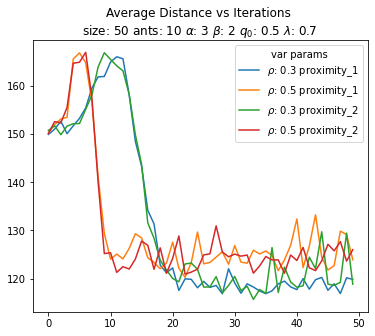

In [10]:
plot_many_distances(list_distances1, legend_labels1,  title = text_title1, save = True, name2save = "params_p") #, ylim = (100,350))

## Plot the variation of $q_0$

In this experiment, we varied the $q_0$ parameter and proximity. 

In [11]:
params = pd.read_excel(EXPERIMENT_FILE, sheet_name="params_q_0")
params

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,50,10,1,3,2,0.3,NaN,0,0.3,0.7,proximity_1
1,50,10,1,3,2,0.3,NaN,0,0.5,0.7,proximity_1
2,50,10,1,3,2,0.3,NaN,0,0.7,0.7,proximity_1
3,50,10,1,3,2,0.3,NaN,0,0.3,0.7,proximity_2
4,50,10,1,3,2,0.3,NaN,0,0.5,0.7,proximity_2
5,50,10,1,3,2,0.3,NaN,0,0.7,0.7,proximity_2


In [12]:
# plot histories_params_p
MAX_ITER = 50
EXECUTIONS_PER_EXPERIMENT = 30


h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, "histories_params_q_0")

list_distances2 = []
legend_labels2 = []
for exp_idx, row in params.iterrows():
    stack_list = []
    for execution in range(EXECUTIONS_PER_EXPERIMENT):
        file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                    str(exp_idx).zfill(2),
                    str(execution).zfill(2))
        file_name = os.path.join(res_dir, file_name)
        history = np.load(file_name, allow_pickle='TRUE').item()
        stack_list.append(history['distances_avg'][h_range])
        
    list_distances2.append(np.stack(stack_list).mean(axis = 0))
    legend_labels2.append(r"$q_0$: {} {}".format(
            row["q_0"],
            row["proximity"]))
    
s_row = params.iloc[1]
    
text_title2 = "size: {} ".format(s_row['size'])
text_title2 += "ants: {} ".format(s_row['ants'])
text_title2 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title2 += r"$\beta$: {} ".format(s_row['beta'])
text_title2 += r"$\rho$: {} ".format(s_row['p'])
text_title2 += r"$\lambda$: {} ".format(s_row['penalty'])


legend_labels2

['$q_0$: 0.3 proximity_1',
 '$q_0$: 0.5 proximity_1',
 '$q_0$: 0.7 proximity_1',
 '$q_0$: 0.3 proximity_2',
 '$q_0$: 0.5 proximity_2',
 '$q_0$: 0.7 proximity_2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 143.31333333333333
min dist: 115.1266666666667
min dist: 103.97999999999999
min dist: 141.60000000000002
min dist: 117.05333333333331
min dist: 103.56666666666668


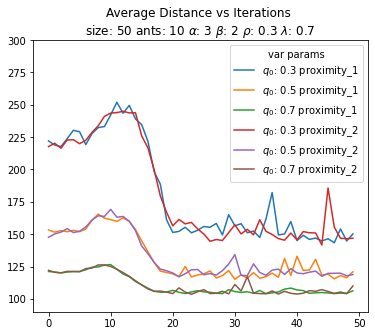

In [13]:
plot_many_distances(list_distances2, legend_labels2,  title = text_title2, ylim=(90,300), save = True, name2save = "params_q_0")

## Plot the variation of penalty

In this experiment, we varied the $\lambda$ parameter and proximity. 

In [14]:
params = pd.read_excel(EXPERIMENT_FILE, sheet_name="params_penalty")
params

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,50,10,1,3,2,0.5,NaN,0,0.7,0.3,proximity_1
1,50,10,1,3,2,0.5,NaN,0,0.7,0.5,proximity_1
2,50,10,1,3,2,0.5,NaN,0,0.7,0.7,proximity_1
3,50,10,1,3,2,0.5,NaN,0,0.7,0.3,proximity_2
4,50,10,1,3,2,0.5,NaN,0,0.7,0.5,proximity_2
5,50,10,1,3,2,0.5,NaN,0,0.7,0.7,proximity_2


In [15]:
# plot histories_params_p
MAX_ITER = 50
EXECUTIONS_PER_EXPERIMENT = 30



h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, "histories_params_penalty")

list_distances3 = []
legend_labels3 = []
for exp_idx, row in params.iterrows():
    stack_list = []
    for execution in range(EXECUTIONS_PER_EXPERIMENT):
        file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                    str(exp_idx).zfill(2),
                    str(execution).zfill(2))
        file_name = os.path.join(res_dir, file_name)
        history = np.load(file_name, allow_pickle='TRUE').item()
        stack_list.append(history['distances_avg'][h_range])
        
    list_distances3.append(np.stack(stack_list).mean(axis = 0))
    legend_labels3.append(r"$\lambda$: {} {}".format(
            row["penalty"],
            row["proximity"]))
    
s_row = params.iloc[1]
    
text_title3 = "size: {} ".format(s_row['size'])
text_title3 += "ants: {} ".format(s_row['ants'])
text_title3 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title3 += r"$\beta$: {} ".format(s_row['beta'])
text_title3 += r"$\rho$: {} ".format(s_row['p'])
text_title3 += r"$q_0$: {} ".format(s_row['q_0'])


legend_labels3

['$\\lambda$: 0.3 proximity_1',
 '$\\lambda$: 0.5 proximity_1',
 '$\\lambda$: 0.7 proximity_1',
 '$\\lambda$: 0.3 proximity_2',
 '$\\lambda$: 0.5 proximity_2',
 '$\\lambda$: 0.7 proximity_2']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 127.37333333333335
min dist: 116.48000000000002
min dist: 105.89999999999996
min dist: 127.45333333333333
min dist: 115.44666666666667
min dist: 105.73333333333332


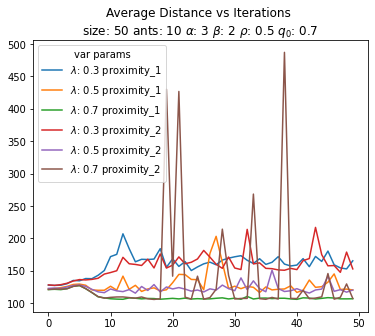

In [16]:
plot_many_distances(list_distances3, legend_labels3,  title = text_title3, save = True, name2save = "params_penalty")

In [17]:
exp_name = "params_penalty_p_0-3"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name=exp_name)
params

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,50,10,1,3,2,0.3,NaN,0,0.7,0.4,proximity_1
1,50,10,1,3,2,0.3,NaN,0,0.7,0.6,proximity_1
2,50,10,1,3,2,0.3,NaN,0,0.7,0.8,proximity_1
3,50,10,1,3,2,0.3,NaN,0,0.7,0.4,proximity_2
4,50,10,1,3,2,0.3,NaN,0,0.7,0.6,proximity_2
5,50,10,1,3,2,0.3,NaN,0,0.7,0.8,proximity_2


In [18]:
# plot histories_params_p
MAX_ITER = 50
EXECUTIONS_PER_EXPERIMENT = 30



h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, f"histories_{exp_name}")

list_distances3 = []
legend_labels3 = []
for exp_idx, row in params.iterrows():
    stack_list = []
    for execution in range(EXECUTIONS_PER_EXPERIMENT):
        file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                    str(exp_idx).zfill(2),
                    str(execution).zfill(2))
        file_name = os.path.join(res_dir, file_name)
        history = np.load(file_name, allow_pickle='TRUE').item()
        stack_list.append(history['distances_avg'][h_range])
        
    list_distances3.append(np.stack(stack_list).mean(axis = 0))
    legend_labels3.append(r"$\lambda$: {:.2f} {}".format(
            row["penalty"],
            row["proximity"]))
    
s_row = params.iloc[1]
    
text_title3 = "size: {} ".format(s_row['size'])
text_title3 += "ants: {} ".format(s_row['ants'])
text_title3 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title3 += r"$\beta$: {} ".format(s_row['beta'])
text_title3 += r"$\rho$: {} ".format(s_row['p'])
text_title3 += r"$q_0$: {} ".format(s_row['q_0'])


legend_labels3

['$\\lambda$: 0.40 proximity_1',
 '$\\lambda$: 0.60 proximity_1',
 '$\\lambda$: 0.80 proximity_1',
 '$\\lambda$: 0.40 proximity_2',
 '$\\lambda$: 0.60 proximity_2',
 '$\\lambda$: 0.80 proximity_2']

In [19]:
np.array(list_distances3).shape

(6, 50)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


min dist: 123.88666666666668
min dist: 107.86666666666666
min dist: 102.50666666666669
min dist: 124.04
min dist: 106.58666666666664
min dist: 101.68666666666667


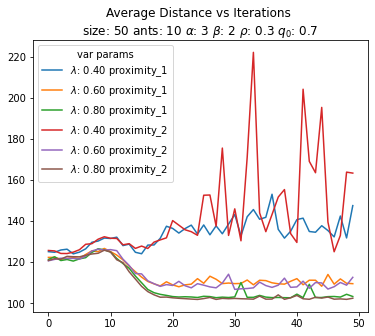

In [20]:
plot_many_distances(list_distances3, legend_labels3,  title = text_title3, save = True, name2save = "params_penalty")

min dist: 116.85999999999999
min dist: 120.24666666666666
min dist: 115.67333333333337
min dist: 120.90666666666661
min dist: 143.31333333333333
min dist: 115.1266666666667
min dist: 103.97999999999999
min dist: 141.60000000000002
min dist: 117.05333333333331
min dist: 103.56666666666668
min dist: 123.88666666666668
min dist: 107.86666666666666
min dist: 102.50666666666669
min dist: 124.04
min dist: 106.58666666666664
min dist: 101.68666666666667


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


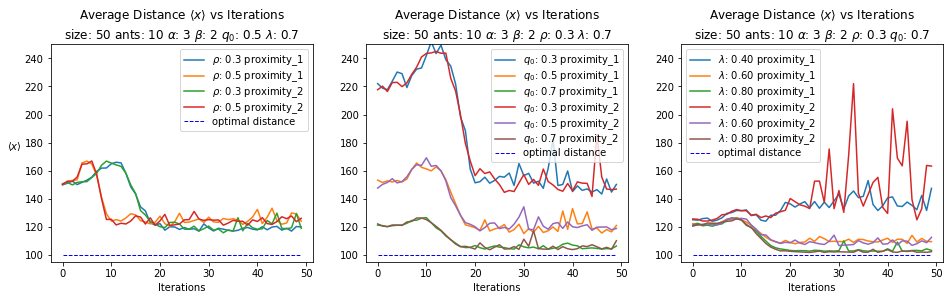

In [41]:

fig, ax = plt.subplots(figsize=(16,4))#, dpi=50)

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
y_lim = (95, 250)

plot_many_distances_ax(ax1,list_distances1[0:4], legend_labels1[0:4], doble_col_legend = False , title = text_title1, ylim = y_lim, set_ylabel = r"$\langle x \rangle$", set_xlabel = "Iterations", optimal_distance = 100)
plot_many_distances_ax(ax2,list_distances2, legend_labels2, doble_col_legend = False, title = text_title2, ylim = y_lim, set_xlabel = "Iterations", disable_y_tick = False, optimal_distance = 100)
plot_many_distances_ax(ax3,list_distances3, legend_labels3, doble_col_legend = False,  title = text_title3,  ylim = y_lim, set_xlabel = "Iterations", disable_y_tick = False, optimal_distance = 100)

plt.savefig(os.path.join(SAVE_DIR,"params_selection" + ".eps"), bbox_inches='tight', format='eps')

# Plot Proximity per size

In [42]:
exp_name = "params_proximity_dif_size"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name= exp_name)
params.head()

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,10,10,1,3,2,0.3,NaN,0,0.7,0.75,proximity_1
1,20,10,1,3,2,0.3,NaN,0,0.7,0.75,proximity_1
2,30,10,1,3,2,0.3,NaN,0,0.7,0.75,proximity_1
3,40,10,1,3,2,0.3,NaN,0,0.7,0.75,proximity_1
4,50,10,1,3,2,0.3,NaN,0,0.7,0.75,proximity_1


In [43]:
params.loc[(params.index >= 37) & (params.index < 40)]

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
37,180,10,1,3,2,0.3,NaN,0,0.7,0.75,proximity_2
38,190,10,1,3,2,0.3,NaN,0,0.7,0.75,proximity_2
39,200,10,1,3,2,0.3,NaN,0,0.7,0.75,proximity_2


In [44]:
# plot histories_params_p
MAX_ITER = 100
EXECUTIONS_PER_EXPERIMENT = 30
MAX_SIZE = 110

h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, f"histories_{exp_name}")

list_distances4 = []
legend_labels4 = ['proximity 1', 'proximity 2']
list_x_values = []
list_std_dist4 = []

for proximity in legend_labels4:
    sub_df = params.loc[params['proximity'] == proximity.replace(" ", "_")]
    tmp_list = []
    tmp_list2 = []
    list_sizes = []
    for exp_idx, row in sub_df.iterrows():
        stack_list = []
        for execution in range(EXECUTIONS_PER_EXPERIMENT):
            file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                        str(exp_idx).zfill(2),
                        str(execution).zfill(2))
            file_name = os.path.join(res_dir, file_name)
            if os.path.isfile(file_name) and exp_idx != 29 and exp_idx !=39:
                history = np.load(file_name, allow_pickle='TRUE').item()
                stack_list.append(history['distances_avg'][h_range])
        
        #tmp_list2.append(np.std(stack_list))
        tmp_list2.append(np.std(stack_list, ddof=1) / np.sqrt(np.size(stack_list)))
        if len(stack_list) != 0: tmp_list.append(stack_list)
        #tmp_list.append(np.mean(remove_outliers(stack_list)))
        #tmp_list.append(remove_outliers(stack_list))
        list_sizes.append(row['size'])
    list_distances4.append(tmp_list)
    list_std_dist4.append(tmp_list2)
    list_x_values.append(list_sizes)
        
    
s_row = params.iloc[1]
    
text_title4 = "ants: {} ".format(s_row['ants'])
text_title4 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title4 += r"$\beta$: {} ".format(s_row['beta'])
text_title4 += r"$\rho$: {} ".format(s_row['p'])
text_title4 += r"$q_0$: {} ".format(s_row['q_0'])
text_title4 += r"$\lambda$: {} ".format(s_row['penalty'])


/home/israel.pineda/miniconda3/envs/aco_rw/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/israel.pineda/miniconda3/envs/aco_rw/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/israel.pineda/miniconda3/envs/aco_rw/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [45]:
# 2 proximities
# 19 sizes
# 30 executions
# 100 iterations
data = np.array(list_distances4)
data.shape

(2, 19, 30, 100)

min dist: 18.040000000000003
min dist: 38.14666666666666
min dist: 58.56000000000001
min dist: 80.11333333333337
min dist: 102.89333333333333
min dist: 126.32
min dist: 149.32000000000002
min dist: 172.78
min dist: 197.63333333333335
min dist: 220.71333333333328


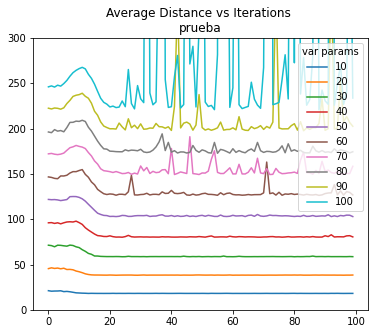

In [46]:
# Proximity 1
test_data = data[0,:10,:,:].mean(axis=1)
labels = np.arange(10, 191, 10)[:10]
plot_many_distances(test_data, labels,  title = "prueba", ylim = (0,300))

min dist: 18.040000000000003
min dist: 38.153333333333336
min dist: 58.84000000000001
min dist: 80.39333333333335
min dist: 102.31333333333335
min dist: 125.68000000000004
min dist: 149.13333333333335
min dist: 173.18666666666667
min dist: 194.89333333333332
min dist: 221.24000000000007


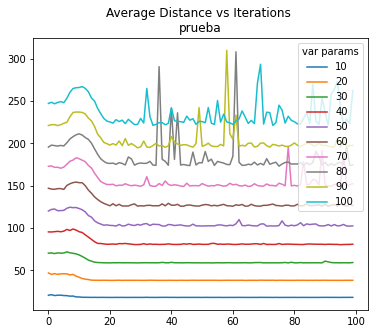

In [47]:
# Proximity 2
test_data = data[1,:10,:,:].mean(axis=1)
labels = np.arange(10, 191, 10)[:10]
plot_many_distances(test_data, labels,  title = "prueba")

min dist: 244.69999999999993
min dist: 269.52000000000004
min dist: 295.6933333333334
min dist: 317.43333333333334
min dist: 345.5733333333334
min dist: 368.66666666666663
min dist: 391.4333333333333
min dist: 419.64666666666665


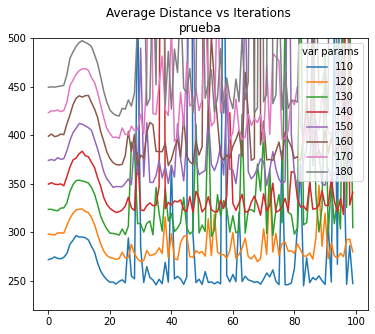

In [48]:
# Proximity 1
test_data = data[0,10:-1,:,:].mean(axis=1)
labels = np.arange(10, 191, 10)[10:-1]
plot_many_distances(test_data, labels,  title = "prueba", ylim = (220,500))

min dist: 244.69999999999993
min dist: 269.52000000000004
min dist: 295.6933333333334
min dist: 320.20000000000005
min dist: 342.43333333333334
min dist: 369.0733333333334
min dist: 390.39333333333343
min dist: 419.82000000000005


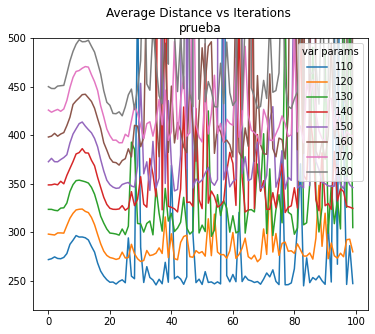

In [49]:
# Proximity 2
test_data = data[1,10:-1,:,:].mean(axis=1)
labels = np.arange(10, 191, 10)[10:-1]
plot_many_distances(test_data, labels,  title = "prueba", ylim = (220,500))

min dist: 18.040000000000003
min dist: 38.14666666666666
min dist: 58.56000000000001
min dist: 80.11333333333337
min dist: 102.89333333333333
min dist: 126.32
min dist: 149.32000000000002
min dist: 172.78
min dist: 197.63333333333335
min dist: 220.71333333333328
min dist: 18.040000000000003
min dist: 38.153333333333336
min dist: 58.84000000000001
min dist: 80.39333333333335
min dist: 102.31333333333335
min dist: 125.68000000000004
min dist: 149.13333333333335
min dist: 173.18666666666667
min dist: 194.89333333333332
min dist: 221.24000000000007


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


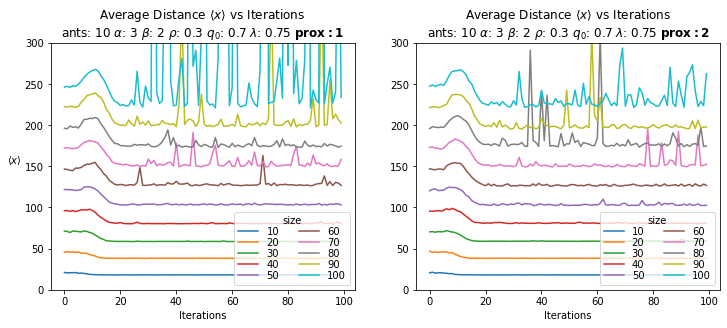

In [50]:
#[0.5, 0.6, 0.7, 0.8, 0.9]
fig, ax = plt.subplots(figsize=(12,10))#, dpi=50)

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
#ax3 = plt.subplot(223)
#ax4 = plt.subplot(224)
y_lim = (0,300)

# title_base

title_base = "ants: {} ".format(10)
title_base += r"$\alpha$: {} ".format(3)
title_base += r"$\beta$: {} ".format(2)
title_base += r"$\rho$: {} ".format(0.3)
title_base += r"$q_0$: {} ".format(0.7)
title_base += r"$\lambda$: {} ".format(0.75)

labels = np.arange(10, 191, 10)[:10]
test_data = data[0,:10,:,:].mean(axis=1)
plot_many_distances_ax(ax1,test_data, labels, legend_title = 'size' ,  title = title_base + r'$\mathbf{prox: 1}$', ylim = y_lim, set_ylabel = r"$\langle x \rangle$", set_xlabel = "Iterations")
test_data = data[1,:10,:,:].mean(axis=1)
plot_many_distances_ax(ax2,test_data, labels, legend_title = 'size', title = title_base + r'$\mathbf{prox: 2}$', ylim = y_lim, set_xlabel = "Iterations", disable_y_tick = False)
#labels = np.arange(10, 191, 10)[10:]
#test_data = data[0,10:,:,:].mean(axis=1)
#y_lim = (220,600)
#plot_many_distances_ax(ax3,test_data, labels,  title = r'proximity 1',  ylim = y_lim, set_xlabel = "Iterations")
#test_data = data[1,10:,:,:].mean(axis=1)
#plot_many_distances_ax(ax4,test_data, labels,  title = r'proximity 2',  ylim = y_lim, set_xlabel = "Iterations", disable_y_tick = True)

plt.savefig(os.path.join(SAVE_DIR,"params_selection_size_vs_prox" + ".eps"), bbox_inches='tight', format='eps')

min dist: 18.080000000000002
min dist: 18.093333333333337


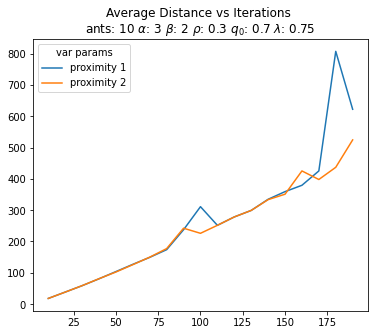

In [53]:
test_data = data[:,:,:,49].mean(axis = 2)
test_data.shape
labels = ['proximity 1', 'proximity 2']
list_x_values = np.arange(10, 191, 10)
plot_many_distances(test_data, legend_labels4,  title = text_title4, list_x = list_x_values)

In [54]:
exp_name = "params_penalty_dif_size"
params = pd.read_excel(EXPERIMENT_FILE, sheet_name= exp_name)
params

,size,ants,tau_0,alpha,beta,p,intensity,local_p,q_0,penalty,proximity
0,10,10,1,3,2,0.3,NaN,0,0.7,0.5,proximity_1
1,20,10,1,3,2,0.3,NaN,0,0.7,0.5,proximity_1
2,30,10,1,3,2,0.3,NaN,0,0.7,0.5,proximity_1
3,40,10,1,3,2,0.3,NaN,0,0.7,0.5,proximity_1
4,50,10,1,3,2,0.3,NaN,0,0.7,0.5,proximity_1
...,...,...,...,...,...,...,...,...,...,...,...
95,160,10,1,3,2,0.3,NaN,0,0.7,0.9,proximity_1
96,170,10,1,3,2,0.3,NaN,0,0.7,0.9,proximity_1
97,180,10,1,3,2,0.3,NaN,0,0.7,0.9,proximity_1
98,190,10,1,3,2,0.3,NaN,0,0.7,0.9,proximity_1


In [55]:
# plot histories_params_p
MAX_ITER = 100
EXECUTIONS_PER_EXPERIMENT = 30



h_range = slice(0, MAX_ITER)

res_dir = os.path.join(RESULTS_DIR, f"histories_{exp_name}")

list_distances4 = []
legend_labels4 = [0.5, 0.6, 0.7, 0.8, 0.9]
list_x_values = []
list_std_dist4 = []

for proximity in legend_labels4:
    sub_df = params.loc[(params['penalty'] == proximity) & (params['size'] <= 100 )]
    tmp_list = []
    tmp_list2 = []
    list_sizes = []
    for exp_idx, row in sub_df.iterrows():
        stack_list = []
        for execution in range(EXECUTIONS_PER_EXPERIMENT):
            file_name = "history_exp_{}_exc_{}_iter_100.npy".format(
                        str(exp_idx).zfill(2),
                        str(execution).zfill(2))
            file_name = os.path.join(res_dir, file_name)
            if os.path.isfile(file_name):
                history = np.load(file_name, allow_pickle='TRUE').item()
                stack_list.append(history['distances_avg'][h_range])

        #tmp_list2.append(np.std(stack_list))
        tmp_list2.append(np.std(stack_list, ddof=1) / np.sqrt(np.size(stack_list)))
        tmp_list.append(stack_list)
        #tmp_list.append(np.mean(remove_outliers(stack_list)))
        #tmp_list.append(remove_outliers(stack_list))
        list_sizes.append(row['size'])
    list_distances4.append(tmp_list)
    list_std_dist4.append(tmp_list2)
    list_x_values.append(list_sizes)
        
    
s_row = params.iloc[1]
    
text_title4 = "ants: {} ".format(s_row['ants'])
text_title4 += r"$\alpha$: {} ".format(s_row['alpha'])
text_title4 += r"$\beta$: {} ".format(s_row['beta'])
text_title4 += r"$\rho$: {} ".format(s_row['p'])
text_title4 += r"$q_0$: {} ".format(s_row['q_0'])
text_title4 += "{} ".format(s_row['proximity'].replace("_",": "))


In [56]:
data = np.array(list_distances4)
data.shape

(5, 10, 30, 100)

min dist: 18.639999999999997
min dist: 39.873333333333335
min dist: 62.80666666666666
min dist: 87.51333333333332
min dist: 112.34666666666666
min dist: 143.3733333333333
min dist: 165.10666666666665
min dist: 199.8733333333333
min dist: 225.74666666666673
min dist: 251.00666666666666


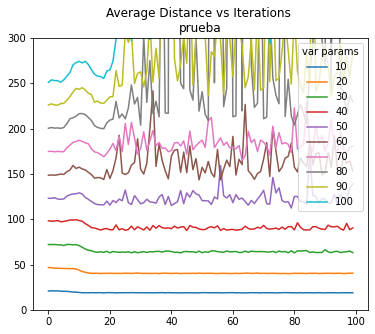

In [57]:
# Penalty 0.5
test_data = data[0,:,:,:].mean(axis=1)
labels = np.arange(10, 191, 10)[:10]
plot_many_distances(test_data, labels,  title = "prueba", ylim = (0,300))

min dist: 18.299999999999997
min dist: 38.96666666666666
min dist: 60.4
min dist: 83.1533333333333
min dist: 106.68666666666664
min dist: 133.1866666666667
min dist: 157.94666666666666
min dist: 187.12000000000003
min dist: 210.87333333333336
min dist: 233.40666666666667


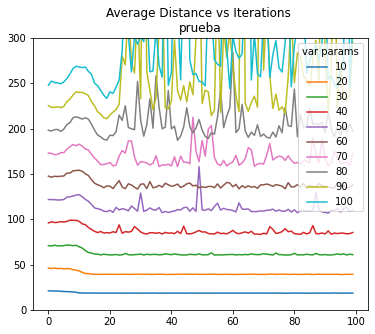

In [58]:
# Penalty 0.6
test_data = data[1,:,:,:].mean(axis=1)
labels = np.arange(10, 191, 10)[:10]
plot_many_distances(test_data, labels,  title = "prueba", ylim = (0,300))

min dist: 18.106666666666662
min dist: 38.32000000000001
min dist: 59.08666666666667
min dist: 81.49333333333334
min dist: 103.41333333333334
min dist: 127.46
min dist: 151.07999999999998
min dist: 174.1133333333333
min dist: 201.17333333333335
min dist: 223.68666666666667


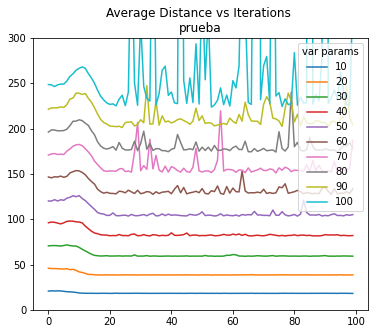

In [59]:
# Penalty 0.7
test_data = data[2,:,:,:].mean(axis=1)
labels = np.arange(10, 191, 10)[:10]
plot_many_distances(test_data, labels,  title = "prueba", ylim = (0,300))

min dist: 18.006666666666668
min dist: 38.13333333333333
min dist: 58.47333333333335
min dist: 80.31333333333333
min dist: 102.1
min dist: 125.53999999999995
min dist: 148.72
min dist: 169.2533333333334
min dist: 194.1933333333333
min dist: 217.26666666666668


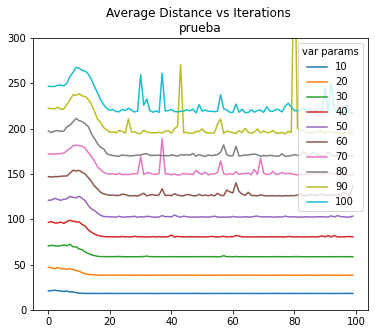

In [60]:
# Penalty 0.8
test_data = data[3,:,:,:].mean(axis=1)
labels = np.arange(10, 191, 10)[:10]
plot_many_distances(test_data, labels,  title = "prueba", ylim = (0,300))

min dist: 18.0
min dist: 38.0
min dist: 58.6
min dist: 79.40666666666667
min dist: 101.75999999999999
min dist: 123.77333333333331
min dist: 146.5
min dist: 169.10666666666665
min dist: 193.17999999999998
min dist: 216.17999999999998


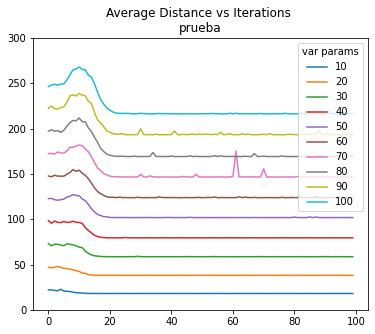

In [61]:
# Penalty 0.9
test_data = data[4,:,:,:].mean(axis=1)
labels = np.arange(10, 191, 10)[:10]
plot_many_distances(test_data, labels,  title = "prueba", ylim = (0,300))

min dist: 18.106666666666662
min dist: 38.32000000000001
min dist: 59.08666666666667
min dist: 81.49333333333334
min dist: 103.41333333333334
min dist: 127.46
min dist: 151.07999999999998
min dist: 174.1133333333333
min dist: 201.17333333333335
min dist: 223.68666666666667
min dist: 18.006666666666668
min dist: 38.13333333333333
min dist: 58.47333333333335
min dist: 80.31333333333333
min dist: 102.1
min dist: 125.53999999999995
min dist: 148.72
min dist: 169.2533333333334
min dist: 194.1933333333333
min dist: 217.26666666666668
min dist: 18.0
min dist: 38.0
min dist: 58.6
min dist: 79.40666666666667
min dist: 101.75999999999999
min dist: 123.77333333333331
min dist: 146.5
min dist: 169.10666666666665
min dist: 193.17999999999998
min dist: 216.17999999999998


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


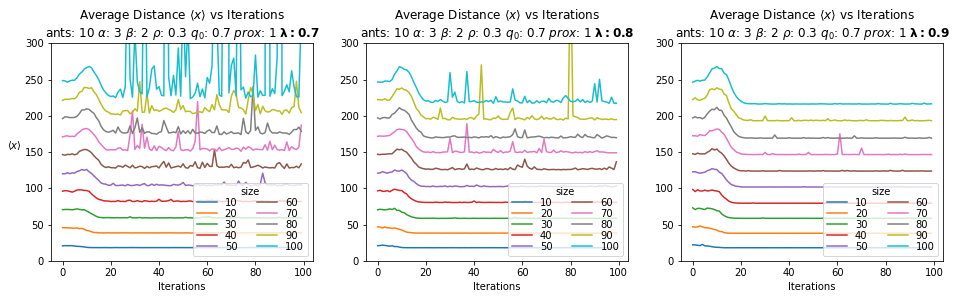

In [62]:
#[0.5, 0.6, 0.7, 0.8, 0.9]
fig, ax = plt.subplots(figsize=(16,4))#, dpi=50)

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(131)
ax4 = plt.subplot(132)
ax5 = plt.subplot(133)
y_lim = (0,300)

labels = np.arange(10, 191, 10)[:10]

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=10)

title_base = "ants: {} ".format(10)
title_base += r"$\alpha$: {} ".format(3)
title_base += r"$\beta$: {} ".format(2)
title_base += r"$\rho$: {} ".format(0.3)
title_base += r"$q_0$: {} ".format(0.7)
title_base += r"$prox$: {} ".format(1)

#test_data = data[0,:,:,:].mean(axis=1)
#plot_many_distances_ax(ax1,test_data, labels, legend_title = 'size', title = title_base + r'$\mathbf{\lambda: 0.5}$', ylim = y_lim, set_ylabel = r"$\langle x \rangle$", set_xlabel = "Iterations")
#test_data = data[1,:,:,:].mean(axis=1)
#plot_many_distances_ax(ax2,test_data, labels, legend_title = 'size', title = title_base + r'$\mathbf{\lambda: 0.6}$', ylim = y_lim, set_xlabel = "Iterations", disable_y_tick = False)
test_data = data[2,:,:,:].mean(axis=1)
plot_many_distances_ax(ax3,test_data, labels, legend_title = 'size', title = title_base + r'$\mathbf{\lambda: 0.7}$',  ylim = y_lim, set_ylabel = r"$\langle x \rangle$", set_xlabel = "Iterations", disable_y_tick = False)
test_data = data[3,:,:,:].mean(axis=1)
plot_many_distances_ax(ax4,test_data, labels, legend_title = 'size', title = title_base + r'$\mathbf{\lambda: 0.8}$',  ylim = y_lim,set_xlabel = "Iterations")
test_data = data[4,:,:,:].mean(axis=1)
plot_many_distances_ax(ax5,test_data, labels, legend_title = 'size', title = title_base + r'$\mathbf{\lambda: 0.9}$',  ylim = y_lim, set_xlabel = "Iterations", disable_y_tick = False)

plt.savefig(os.path.join(SAVE_DIR,"params_selection_penalty_vs_size" + ".eps"), bbox_inches='tight', format='eps')